In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'C:\Users\Masood\complete-pandas-tutorial\csvs\healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
#complete summary of dataframe of numeric columns
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


the age range of patients is between 18 to 85. the minimum biling amount is 1000 and maximum biling is _~ 500000

In [5]:
# categorical summary
df.describe(include='O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [6]:
df.shape

(10000, 15)

#### Data Cleaning

In [63]:
#check for NULL values if any in each column
df.isnull().sum()

Age                          0
Gender                       0
Blood Type                   0
Medical Condition            0
Doctor                       0
Hospital                     0
Insurance Provider           0
Billing Amount               0
Admission Type               0
Medication                   0
Test Results                 0
No. of days hospilatlized    0
dtype: int64

In [64]:
#check if there are duplicate records in the data
df.duplicated().sum()

0

there are no duplicate records


In [65]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,No. of days hospilatlized
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


In [ ]:
for date in ['Date of Admission','Discharge Date']:
    df[date] = pd.to_datetime(df[date])

In [6]:
df['No. of days hospilatlized'] =(df['Discharge Date']-df['Date of Admission']).dt.days

In [7]:
print(df['No. of days hospilatlized'])

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: No. of days hospilatlized, Length: 10000, dtype: int64


In [8]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'No. of days hospilatlized'],
      dtype='object')

In [9]:
#drop columns irrelevant to our analysis
df = df.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'No. of days hospilatlized'],
      dtype='object')

DATA EXPLORATION AND VISUALIZATION

In [10]:
#using for loop to find the distribution of data for categorical columns
for col in df.columns:
    if df[col].dtype == 'O' and col != 'Doctor' and col != 'Hospital':
        print(df[col].value_counts())
        print('----------------')

Gender
Female    5075
Male      4925
Name: count, dtype: int64
----------------
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64
----------------
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64
----------------
Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64
----------------
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64
----------------
Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64
----------------
Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64
----------------


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Gender                     10000 non-null  object 
 2   Blood Type                 10000 non-null  object 
 3   Medical Condition          10000 non-null  object 
 4   Doctor                     10000 non-null  object 
 5   Hospital                   10000 non-null  object 
 6   Insurance Provider         10000 non-null  object 
 7   Billing Amount             10000 non-null  float64
 8   Admission Type             10000 non-null  object 
 9   Medication                 10000 non-null  object 
 10  Test Results               10000 non-null  object 
 11  No. of days hospilatlized  10000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB


In [22]:
df['Age'].dtype

dtype('int64')

____________________________________________________________________________________________________


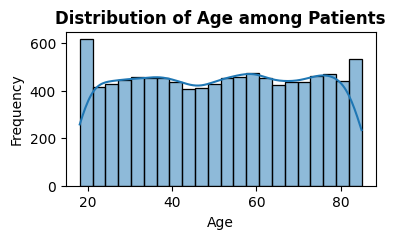

____________________________________________________________________________________________________


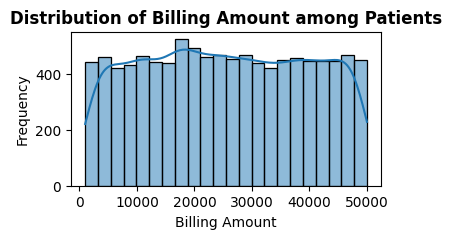

____________________________________________________________________________________________________


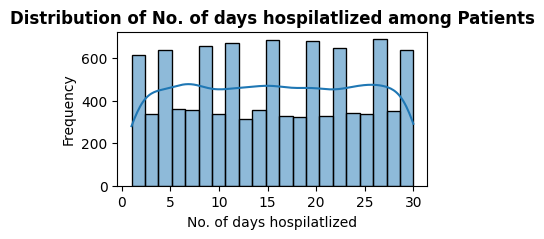

In [ ]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure(figsize = (4,2))
        sns.histplot(df[col],kde='True')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

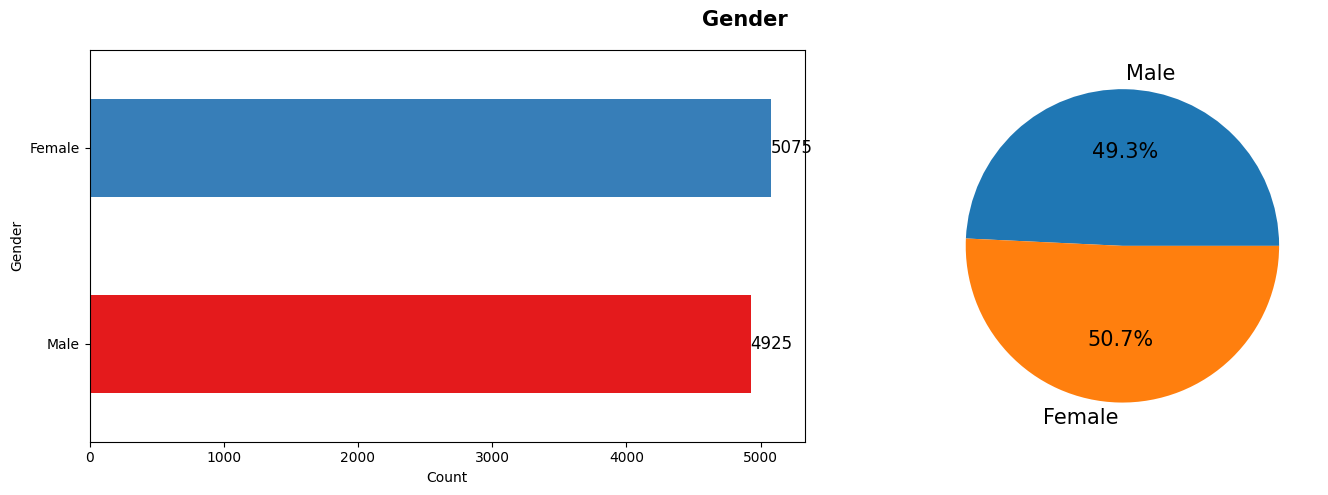

____________________________________________________________________________________________________




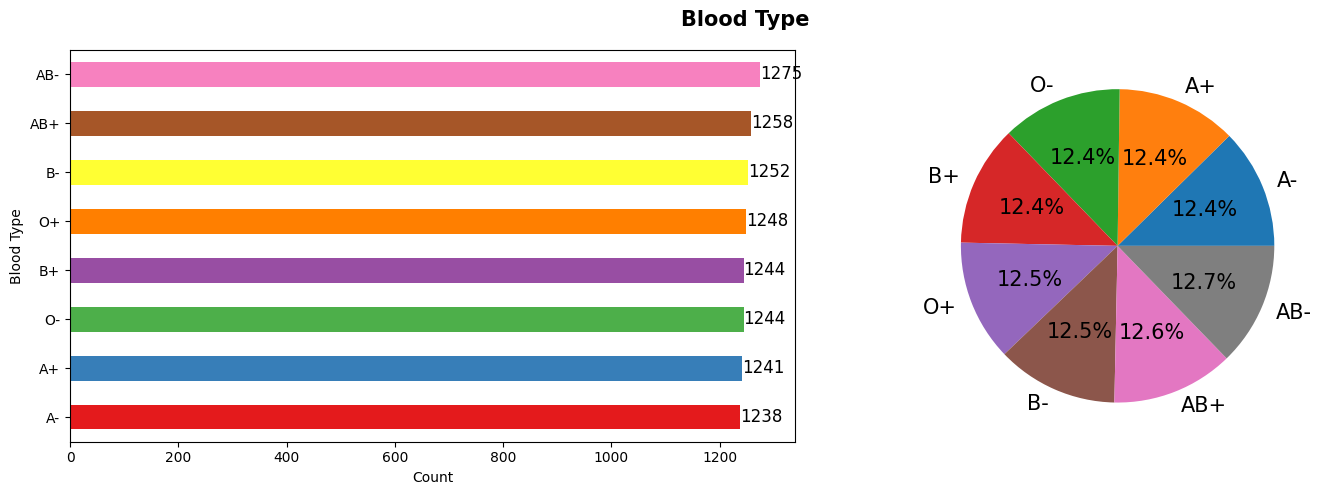

____________________________________________________________________________________________________




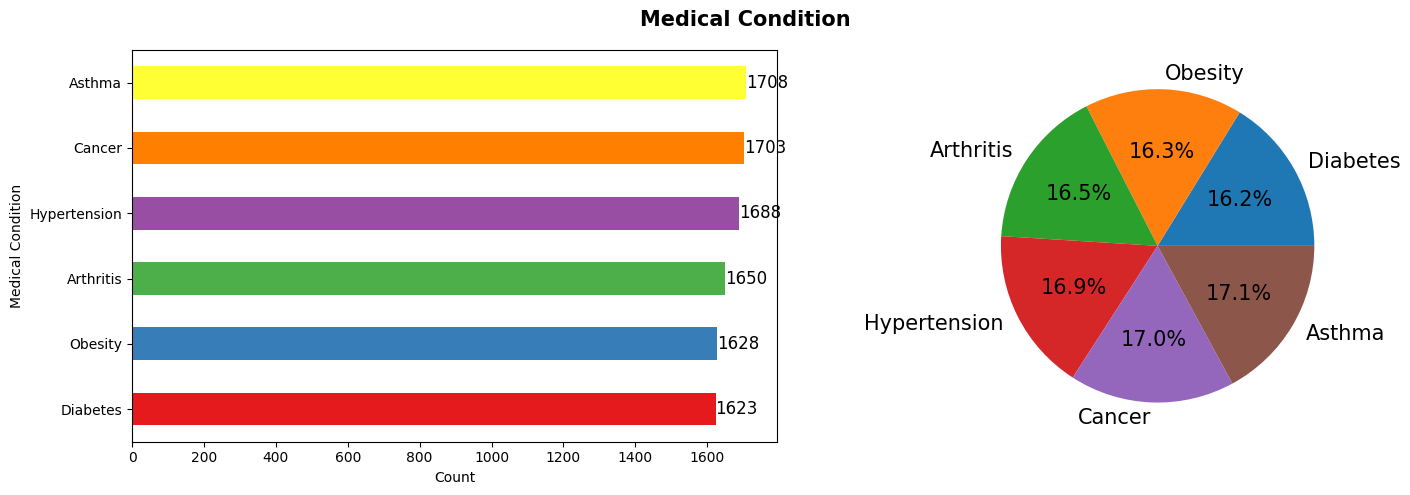

____________________________________________________________________________________________________




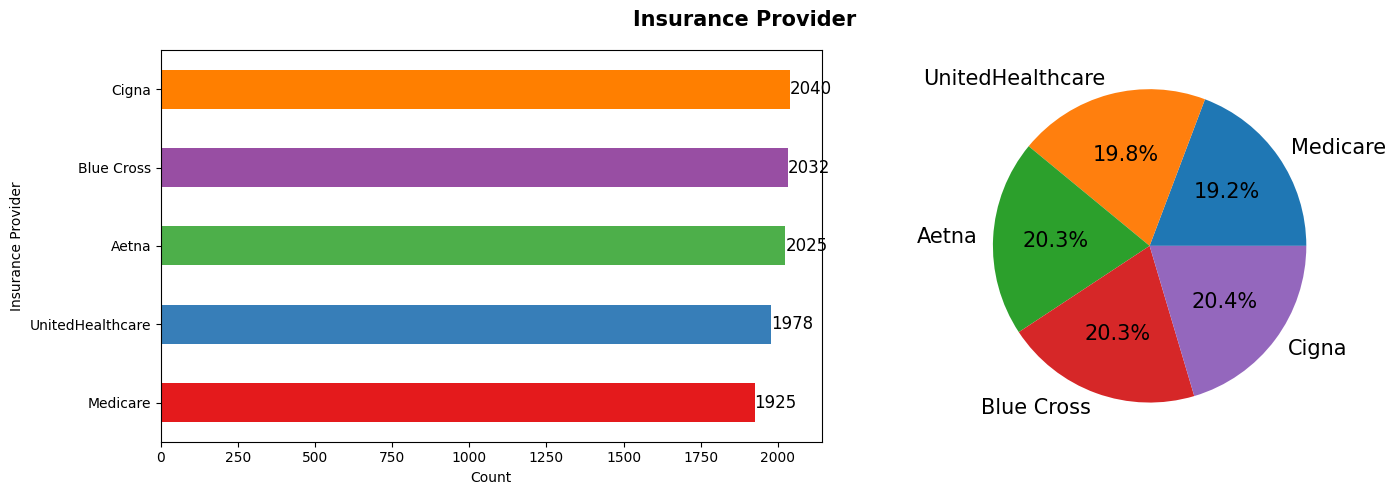

____________________________________________________________________________________________________




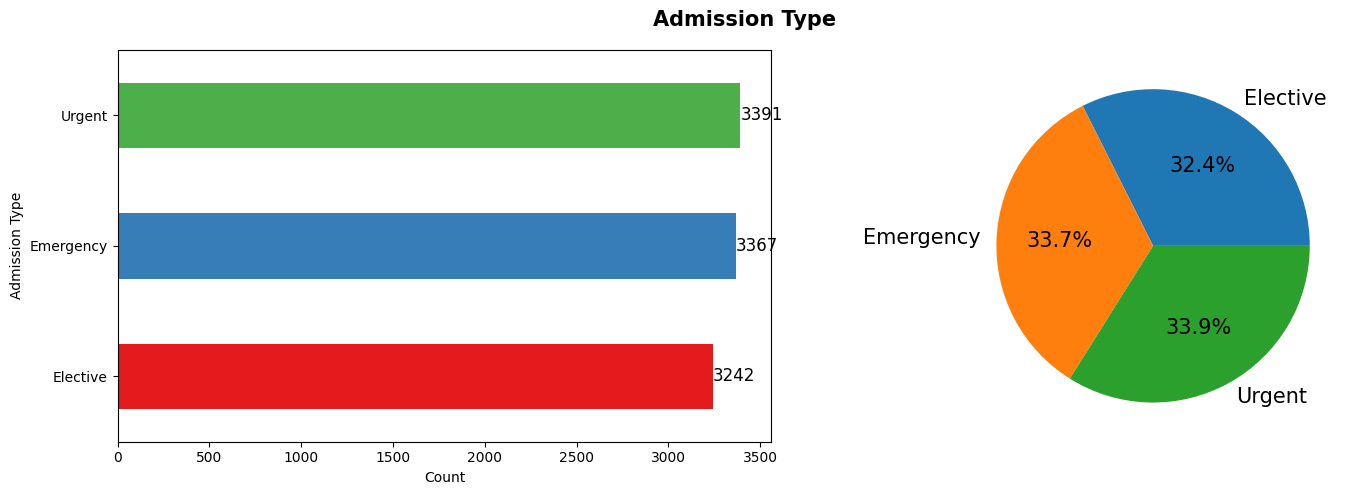

____________________________________________________________________________________________________




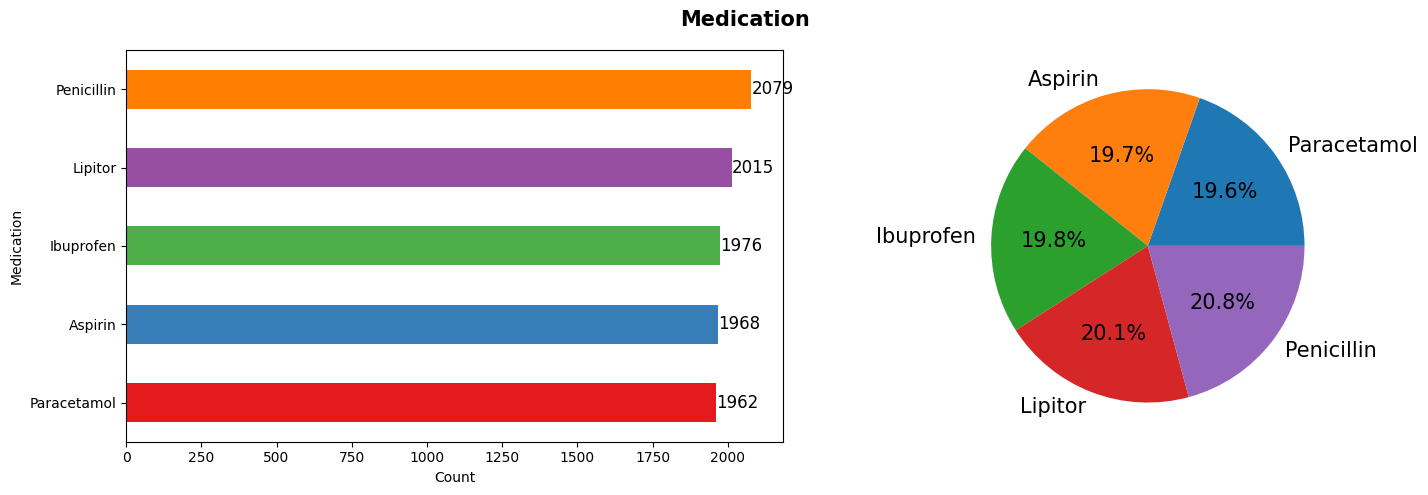

____________________________________________________________________________________________________




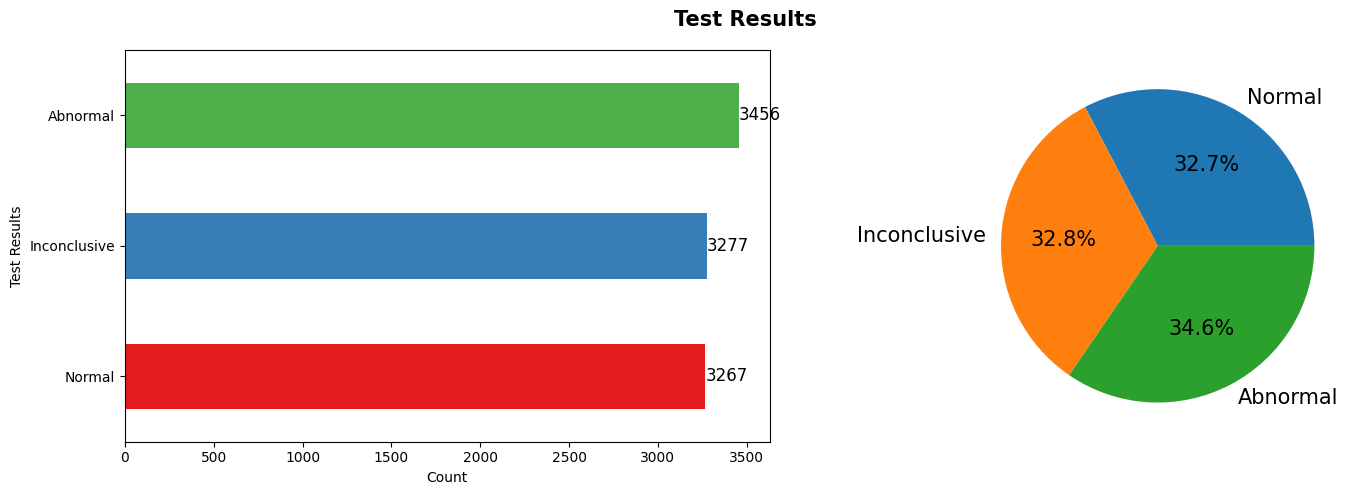

____________________________________________________________________________________________________


In [26]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in df.columns:
    if df[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = df[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',labels = category_count.index,autopct = '%1.1f%%',textprops = {'fontsize':15})
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
        print("_"*100)

**What is the distribution of medical condtions between genders?**

In [ ]:
gender_medical = df.groupby(['Medical Condition','Gender']).size().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


<Axes: xlabel='Medical Condition'>

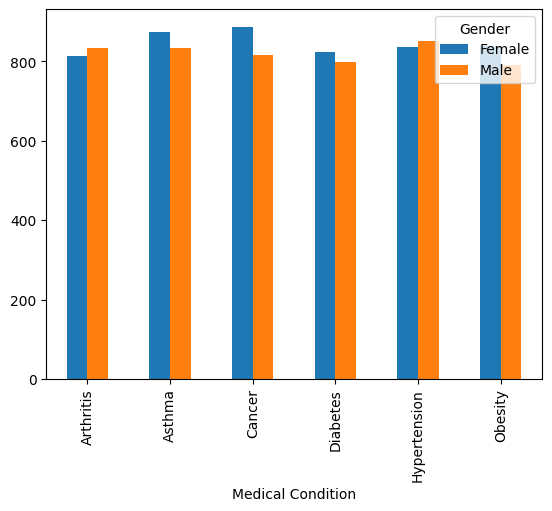

In [32]:
gender_medical.plot(kind='bar')

In [52]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','No. of days hospilatlized']
# creating a df using the above columns
correlate_df = df[correlation_columns]
# encoding categorical columns for correlation
correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = df['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = df['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

C:\Users\Masood\AppData\Local\Temp\ipykernel_15328\1337799307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
C:\Users\Masood\AppData\Local\Temp\ipykernel_15328\1337799307.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlate_df['Admission Type'] = df['Admission Type'].astype('category').cat.codes
C:\Users\Masood\AppData\Local\Temp\ipykernel_15328\1337799307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,Age,Billing Amount,No. of days hospilatlized,Gender,Admission Type,Test Results
Age,1.000000,-0.009483,0.009111,-0.008099,0.003233,0.008747
Billing Amount,-0.009483,1.000000,-0.013507,0.002340,0.002531,-0.005844
No. of days hospilatlized,0.009111,-0.013507,1.000000,-0.006361,-0.005942,-0.008228
Gender,-0.008099,0.002340,-0.006361,1.000000,-0.004515,-0.010472
Admission Type,0.003233,0.002531,-0.005942,-0.004515,1.000000,-0.010964
Test Results,0.008747,-0.005844,-0.008228,-0.010472,-0.010964,1.000000


- In above were converting unique string values by assigning them unique number for correlation
- .cat.codes: Getting integer codes assigned to each category.
- .corr() is correlation function

In [62]:
correlate_df['Test Results'].unique()

array([1, 2, 0], dtype=int8)

In [56]:
correlate_df

,Age,Billing Amount,No. of days hospilatlized,Gender,Admission Type,Test Results
0,81,37490.983364,14,0,0,1
1,35,47304.064845,14,1,1,2
2,61,36874.896997,30,1,1,2
3,49,23303.322092,1,1,2,0
4,51,18086.344184,24,1,2,2
...,...,...,...,...,...,...
9995,83,39606.840083,4,1,0,0
9996,47,5995.717488,23,0,1,2
9997,54,49559.202905,14,1,0,2
9998,84,25236.344761,20,1,2,2


<Axes: >

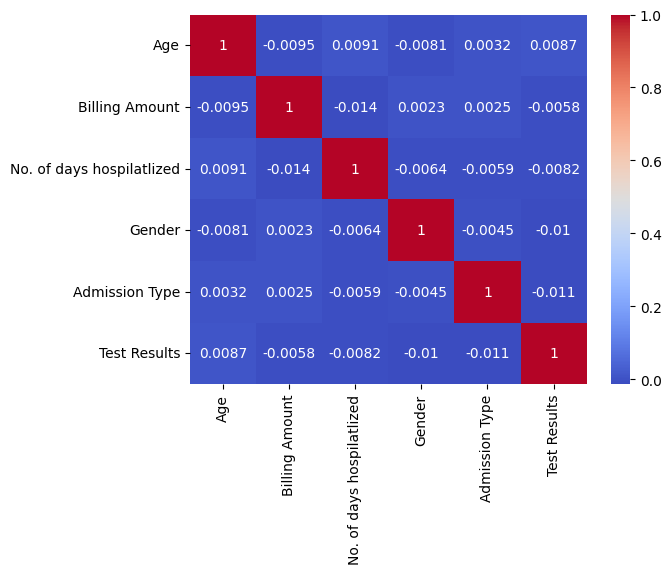

In [59]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

***Interpretation***

* There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a negative correlation between age and billing amount.
* Biling amount has negative correlation with test results and days hospitalized. Billing amount has a positive correlation with admission type and gender.
* Days hospitalized has negative correlation with every attribute except age.
* Except for billing amount attribute, gender has a negative correlation with all other attributes.
* Admission type and test results have a negative correlation.

# top10 billing by hospitals

In [73]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = df.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending=False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Smith and Sons,477638.881124
1,Smith PLC,432283.548554
2,Smith Ltd,428163.073062
3,Smith Inc,351463.888372
4,Williams LLC,327522.472644
5,Thomas Group,327045.374505
6,Johnson Ltd,305971.192470
7,Davis and Sons,293452.520353
8,Jones Inc,290351.193848
9,Brown LLC,284695.674489


C:\Users\Masood\AppData\Local\Temp\ipykernel_15328\3492962035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_hospital_billing['Billing Amount'],y=top10_hospital_billing['Hospital'],palette="Set1")


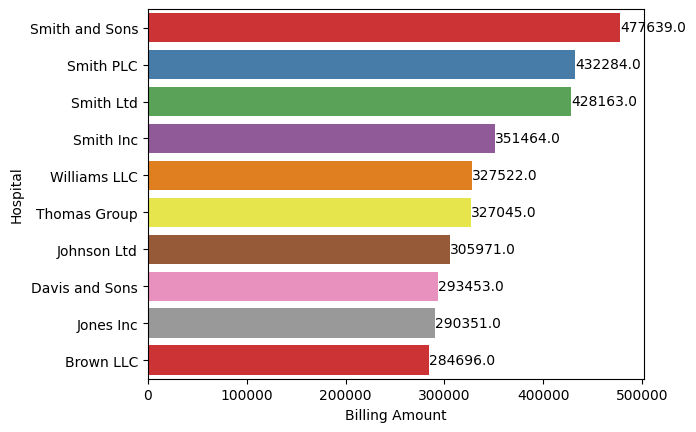

In [77]:
sns.barplot(x=top10_hospital_billing['Billing Amount'],y=top10_hospital_billing['Hospital'],palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')

"Smith and sons" has the highest average billing amount of 477639.0

**Which medical condition generated the highest average billing among male and female?**

In [83]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = df.groupby(['Medical Condition','Gender'])['Billing Amount'].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,24692.417417
1,Arthritis,Male,25670.983684
2,Asthma,Female,25672.743141
3,Asthma,Male,25148.724551
4,Cancer,Female,25370.465132
5,Cancer,Male,25722.399683
6,Diabetes,Female,26369.383481
7,Diabetes,Male,25740.384845
8,Hypertension,Female,25126.230138
9,Hypertension,Male,25268.489378


<Axes: xlabel='Medical Condition', ylabel='Billing Amount'>

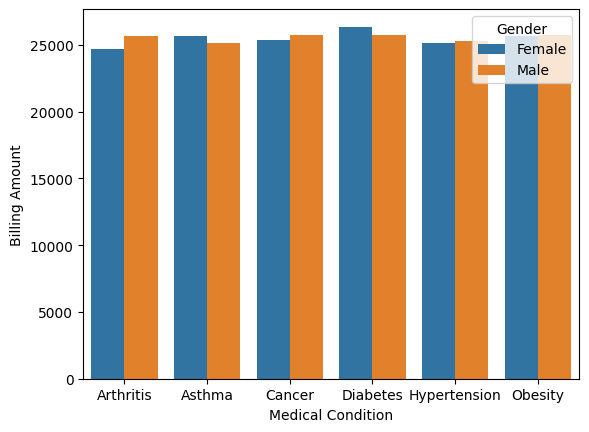

In [84]:
#  plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x=medical_gender_billing['Medical Condition'],y=medical_gender_billing['Billing Amount'],
            hue=medical_gender_billing['Gender'])

In [90]:
# healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
#                                 labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
#                                 right = False)
df['age_group'] = pd.cut(df['Age'],bins=[18,30,40,50,60,70,80,float('inf')],labels=['18-30','31-40','41-50','51-60','61-70','71-80','over 80'],right=False)
age_group = df['age_group'].value_counts().sort_values(ascending=False)
age_group


age_group
18-30      1774
71-80      1523
51-60      1521
31-40      1495
61-70      1467
41-50      1397
over 80     823
Name: count, dtype: int64

<Axes: xlabel='age_group'>

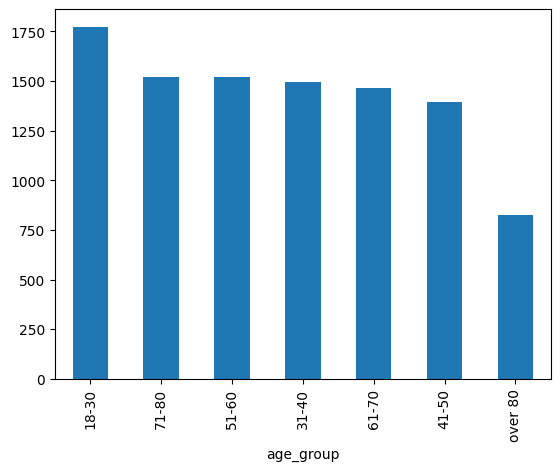

In [91]:
age_group.plot(kind='bar')

Maximum number of patient are in the range of 18-30

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **AB-**.
- Asthma is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.